In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
id,,,,,,,,,,,,,,,,,,,,,
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [3]:
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [4]:
df.iloc[1, 1].strip("{}").split(',')

['TV',
 '"Cable TV"',
 'Internet',
 '"Wireless Internet"',
 '"Air conditioning"',
 'Kitchen',
 '"Free parking on premises"',
 'Heating',
 'Washer',
 'Dryer',
 '"Smoke detector"',
 '"Carbon monoxide detector"',
 '"First aid kit"',
 'Essentials',
 'Shampoo',
 '"Lock on bedroom door"',
 '"24-hour check-in"',
 'Hangers',
 'Iron',
 '"Laptop friendly workspace"',
 '"translation missing: en.hosting_amenity_49"',
 '"translation missing: en.hosting_amenity_50"']

In [5]:
# 文字列要素の要素を調べる
for column in ['bed_type', 'cancellation_policy', 'city', 'property_type', 'room_type']:
    print(column)
    print(df[column].unique())
    print(df[column].value_counts())

bed_type
['Real Bed' 'Pull-out Sofa' 'Airbed' 'Futon' 'Couch']
Real Bed         53989
Futon              569
Pull-out Sofa      453
Airbed             364
Couch              208
Name: bed_type, dtype: int64
cancellation_policy
['flexible' 'strict' 'moderate' 'super_strict_30' 'super_strict_60']
strict             24318
flexible           16886
moderate           14288
super_strict_30       78
super_strict_60       13
Name: cancellation_policy, dtype: int64
city
['LA' 'DC' 'NYC' 'SF' 'Chicago' 'Boston']
NYC        24326
LA         16828
SF          4768
DC          4259
Chicago     2807
Boston      2595
Name: city, dtype: int64
property_type
['Apartment' 'House' 'Townhouse' 'Loft' 'Cabin' 'Condominium'
 'Guest suite' 'Guesthouse' 'Other' 'Bungalow' 'Villa' 'Bed & Breakfast'
 'Dorm' 'Timeshare' 'Camper/RV' 'Cave' 'Hostel' 'Earth House' 'In-law'
 'Serviced apartment' 'Boat' 'Tent' 'Castle' 'Boutique hotel'
 'Vacation home' 'Hut' 'Treehouse' 'Yurt' 'Chalet' 'Island' 'Tipi' 'Train'
 'Parkin

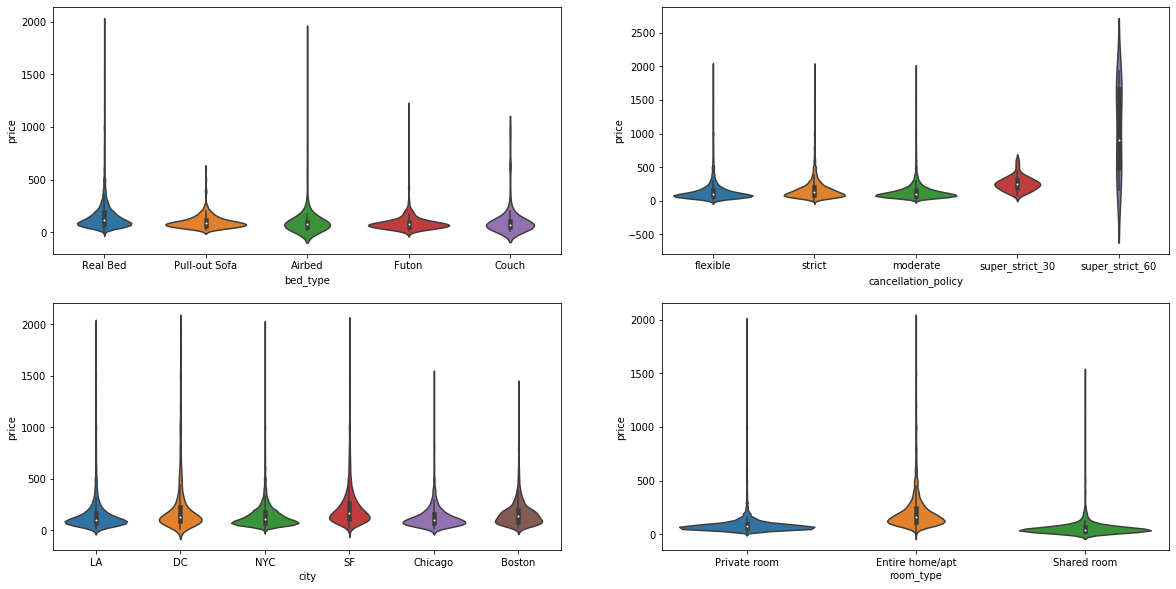

In [6]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

x1 = df['bed_type']
x2 = df['cancellation_policy']
x3 = df['city']
x4 = df['room_type']
y = df['y']

for x, ax in zip([x1, x2, x3, x4], [ax1, ax2, ax3, ax4]):
    sns.violinplot(x=x, y=y, ax=ax)
    ax.set_ylabel('price')

In [7]:
# キャンセルポリシーとroom_typeはランクづけする
# bed_typeとcityはダミー変数を用いることとする。
df['cancellation_policy'] = df['cancellation_policy'].map(
    {'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict_30': 3, 'super_strict_60': 4})
df['room_type'] = df['room_type'].map({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
df.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
id,,,,,,,,,,,,,,,,,,,,,
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,0,LA,t,My place is meant for family and a few friends...,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,1,NaN,90804,138.0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,2,DC,t,This is a new listing for a lovely guest bedro...,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,1,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,2,NYC,t,We're looking forward to your stay at our apt....,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,1,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,2,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,1,NaN,94133,166.0
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,2,NYC,t,Charming Apartment on the upper west side of M...,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,2,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [8]:
df = pd.get_dummies(df, columns=['bed_type' , 'city'])
df.head()

,accommodates,amenities,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,description,first_review,host_has_profile_pic,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
id,,,,,,,,,,,,,,,,,,,,,
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,1.0,4.0,0,t,My place is meant for family and a few friends...,2016-07-27,t,...,0,0,0,1,0,0,0,1,0,0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,2,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,...,0,0,0,1,0,0,1,0,0,0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,1.0,1.0,2,t,We're looking forward to your stay at our apt....,2016-06-15,t,...,0,0,0,1,0,0,0,0,1,0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,2,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,...,0,0,0,1,0,0,0,0,0,1
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,1.0,1.0,2,t,Charming Apartment on the upper west side of M...,2015-08-05,t,...,0,0,0,1,0,0,0,0,1,0


In [9]:
# true or falseの列を変換する
df = df.replace({'t': 1, 'f': 0})
df.head()

,accommodates,amenities,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,description,first_review,host_has_profile_pic,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
id,,,,,,,,,,,,,,,,,,,,,
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,1.0,4.0,0,1,My place is meant for family and a few friends...,2016-07-27,1.0,...,0,0,0,1,0,0,0,1,0,0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,2,1,This is a new listing for a lovely guest bedro...,2016-09-12,1.0,...,0,0,0,1,0,0,1,0,0,0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,1.0,1.0,2,1,We're looking forward to your stay at our apt....,2016-06-15,1.0,...,0,0,0,1,0,0,0,0,1,0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,2,1,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,1.0,...,0,0,0,1,0,0,0,0,0,1
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,1.0,1.0,2,1,Charming Apartment on the upper west side of M...,2015-08-05,1.0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# 関連なさそうな不要な列の削除。アメニティは関連ありそうだがいったん削除して推定する
df = df.drop(['amenities', 'description', 'first_review', 'host_since', 'last_review', 'latitude',
              'longitude', 'name', 'neighbourhood','thumbnail_url', 'zipcode'], axis=1)
df.head()

,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
id,,,,,,,,,,,,,,,,,,,,,
0,6,2.0,1.0,4.0,0,1,1.0,0.0,NaN,0,...,0,0,0,1,0,0,0,1,0,0
1,2,1.0,1.0,1.0,2,1,1.0,1.0,100%,0,...,0,0,0,1,0,0,1,0,0,0
2,2,2.0,1.0,1.0,2,1,1.0,0.0,100%,1,...,0,0,0,1,0,0,0,0,1,0
3,2,1.0,1.0,1.0,2,1,1.0,1.0,100%,1,...,0,0,0,1,0,0,0,0,0,1
4,2,1.0,1.0,1.0,2,1,1.0,1.0,100%,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Host room typeとproperty_typeが未対応
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55583 entries, 0 to 55582
Data columns (total 26 columns):
accommodates              55583 non-null int64
bathrooms                 55436 non-null float64
bedrooms                  55512 non-null float64
beds                      55487 non-null float64
cancellation_policy       55583 non-null int64
cleaning_fee              55583 non-null int64
host_has_profile_pic      55435 non-null float64
host_identity_verified    55435 non-null float64
host_response_rate        41879 non-null object
instant_bookable          55583 non-null int64
number_of_reviews         55583 non-null int64
property_type             55583 non-null object
review_scores_rating      43027 non-null float64
room_type                 55583 non-null int64
y                         55583 non-null float64
bed_type_Airbed           55583 non-null uint8
bed_type_Couch            55583 non-null uint8
bed_type_Futon            55583 non-null uint8
bed_type_Pull-out Sofa    555

In [12]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
df['host_response_rate'] = df['host_response_rate'].astype(float) / 100
df['host_response_rate'] = df['host_response_rate'].replace(np.nan, 0)

In [13]:
df.head()

,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
id,,,,,,,,,,,,,,,,,,,,,
0,6,2.0,1.0,4.0,0,1,1.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,2.0,1.0,1.0,2,1,1.0,0.0,1.0,1,...,0,0,0,1,0,0,0,0,1,0
3,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,1,...,0,0,0,1,0,0,0,0,0,1
4,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,0,0,0,1,0,0,0,0,1,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

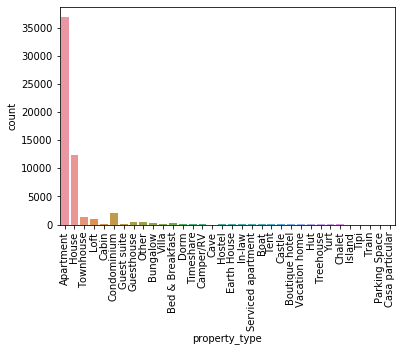

In [14]:
# property_type
sns.countplot(df['property_type'])
plt.xticks(rotation=90) # ほとんどがApartment

In [15]:
# 上位5つ意外をOtherにカウントする
other_list = ['Cabin','Guest suite','Guesthouse', 'Other', 'Bungalow', 'Villa', 'Bed & Breakfast',
 'Dorm', 'Timeshare', 'Camper/RV', 'Cave', 'Hostel', 'Earth House', 'In-law',
 'Serviced apartment', 'Boat', 'Tent', 'Castle', 'Boutique hotel',
 'Vacation home', 'Hut', 'Treehouse', 'Yurt', 'Chalet', 'Island', 'Tipi', 'Train',
 'Parking Space', 'Casa particular']

In [16]:
df['property_type'] = df['property_type'].replace(other_list, 'Other')
df['property_type'].value_counts()

Apartment      36826
House          12326
Other           2285
Condominium     1983
Townhouse       1249
Loft             914
Name: property_type, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['property_type'])
df.head()

,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,city_DC,city_LA,city_NYC,city_SF,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
id,,,,,,,,,,,,,,,,,,,,,
0,6,2.0,1.0,4.0,0,1,1.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,2.0,1.0,1.0,2,1,1.0,0.0,1.0,1,...,0,0,1,0,1,0,0,0,0,0
3,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,1,...,0,0,0,1,1,0,0,0,0,0
4,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,0,0,1,0,1,0,0,0,0,0


In [18]:
# 欠損値の確認。review_score_ratingがまだ
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55583 entries, 0 to 55582
Data columns (total 31 columns):
accommodates                 55583 non-null int64
bathrooms                    55436 non-null float64
bedrooms                     55512 non-null float64
beds                         55487 non-null float64
cancellation_policy          55583 non-null int64
cleaning_fee                 55583 non-null int64
host_has_profile_pic         55435 non-null float64
host_identity_verified       55435 non-null float64
host_response_rate           55583 non-null float64
instant_bookable             55583 non-null int64
number_of_reviews            55583 non-null int64
review_scores_rating         43027 non-null float64
room_type                    55583 non-null int64
y                            55583 non-null float64
bed_type_Airbed              55583 non-null uint8
bed_type_Couch               55583 non-null uint8
bed_type_Futon               55583 non-null uint8
bed_type_Pull-out Sofa   

In [19]:
df['review_scores_rating'].describe()

count    43027.000000
mean        94.077928
std          7.802154
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

/Users/shoujimitsugutaira/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shoujimitsugutaira/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.2000e+01, 3.0000e+00, 6.8000e+01, 2.7000e+01, 1.2000e+01,
        4.2400e+02, 4.3800e+02, 2.3860e+03, 7.0210e+03, 3.2576e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

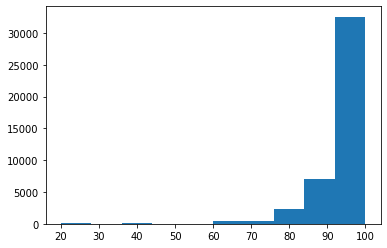

In [20]:
plt.hist(df['review_scores_rating'])
# ほとんどが100点に近いレビューたまに20点、40点とあり。
# スコアがないのはデフォルトで50点としておこうか。

In [21]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(50)

In [22]:
# 欠損値の確認
df.isnull().any()
# bathrooms, bedrooms, beds, host_hasprofile_pic, host_identity_verified

accommodates                 False
bathrooms                     True
bedrooms                      True
beds                          True
cancellation_policy          False
cleaning_fee                 False
host_has_profile_pic          True
host_identity_verified        True
host_response_rate           False
instant_bookable             False
number_of_reviews            False
review_scores_rating         False
room_type                    False
y                            False
bed_type_Airbed              False
bed_type_Couch               False
bed_type_Futon               False
bed_type_Pull-out Sofa       False
bed_type_Real Bed            False
city_Boston                  False
city_Chicago                 False
city_DC                      False
city_LA                      False
city_NYC                     False
city_SF                      False
property_type_Apartment      False
property_type_Condominium    False
property_type_House          False
property_type_Loft  

In [23]:
# bathrooms, bedrooms, bedsは平均値で埋める。
for column in ['bathrooms', 'bedrooms', 'beds']:
    df[column] = df[column].fillna(df[column].mean())

In [24]:
# host_hasprofile_pic, host_identity_verifiedは0で埋める
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)

In [25]:
# データ前処理終了
df.head()

,accommodates,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,city_DC,city_LA,city_NYC,city_SF,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
id,,,,,,,,,,,,,,,,,,,,,
0,6,2.0,1.0,4.0,0,1,1.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,2.0,1.0,1.0,2,1,1.0,0.0,1.0,1,...,0,0,1,0,1,0,0,0,0,0
3,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,1,...,0,0,0,1,1,0,0,0,0,0
4,2,1.0,1.0,1.0,2,1,1.0,1.0,1.0,0,...,0,0,1,0,1,0,0,0,0,0
